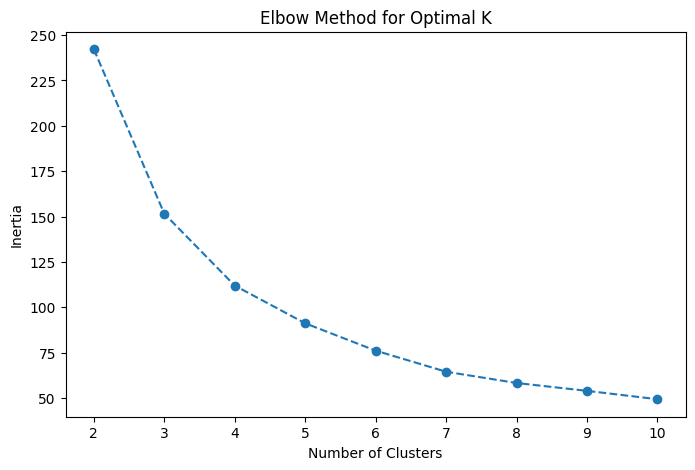

Davies-Bouldin Index: 0.8650620583623065


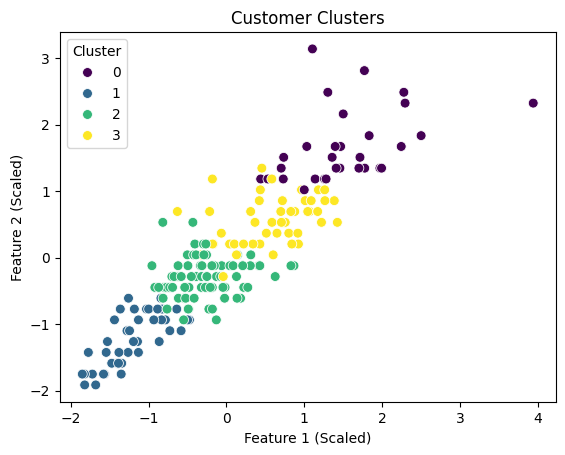

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets on CustomerID
merged = pd.merge(transactions, customers, on='CustomerID')

# Aggregate transaction data by customer
agg_transactions = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count'  # Number of transactions
}).reset_index()

# Merge aggregated data with customer profiles
customer_data = pd.merge(customers, agg_transactions, on='CustomerID')

# Select features for clustering
features = customer_data[['TotalValue', 'Quantity', 'TransactionID']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Use the elbow method to determine the optimal number of clusters
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choose the optimal number of clusters (based on elbow plot)
optimal_k = 4  # Example: Adjust based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_features)

# Add cluster labels to the dataset
customer_data['Cluster'] = kmeans.labels_

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
print(f'Davies-Bouldin Index: {db_index}')

# Visualize the clusters
sns.scatterplot(
    x=scaled_features[:, 0], y=scaled_features[:, 1],
    hue=customer_data['Cluster'], palette='viridis', s=50
)
plt.title('Customer Clusters')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster')
plt.show()

# Save the clustering results
customer_data[['CustomerID', 'Cluster']].to_csv('Customer_Clusters.csv', index=False)